In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.contingency import expected_freq
from statsmodels.graphics.mosaicplot import mosaic

In [26]:
data_set = pd.read_csv('HW1_dataset.csv')
df = data_set['hrwage']

2. Computing of common location measures: mean, median, upper and lower
quartiles, the upper and lower 5%-quantiles. Economic interpretation for every location measure.

    From this data we can see that **average** **hourly** **wage** is 5.16. But we cannot focus on this indicator, because mean is sensitive to outliers. (For example if we have 3 person with wages [1, 2, 99] and their mean wage is 34; and we can see that it is not representative.)

    **Median** is 4.61, that says us that 50% of our respondents has hour wage less than 4.61.

    **Lower quartile** means that 25% of people have hour wage less than 3.03.

    **Upper quartile** means that 75% of people from dataset have hour wage less than 6.24.

    **Lower quantile** means that 5% of people have hourly wage less than 1.44.

    **Upper quantile** means that 95% of people from dataset have hourly wage less than 10.39.

In [27]:
location_measures= {"Mean": round(float(df.mean()), 2),
                     "Median": round(float(df.median()), 2),
                     "Lower quartile": round(float(df.quantile(0.25)), 2),
                     "Upper quartile": round(float(df.quantile(0.75)), 2)
                     }

upper_and_lower_5_quanlile = {"Lower quantile (5%)": round(float(df.quantile(0.05)), 2),
                     "Upper quantile (5%)": round(float(df.quantile(0.95)), 2)}

print(location_measures) 
print(upper_and_lower_5_quanlile)

{'Mean': 5.16, 'Median': 4.61, 'Lower quartile': 3.03, 'Upper quartile': 6.24}
{'Lower quantile (5%)': 1.44, 'Upper quantile (5%)': 10.39}


3. Computing measures of variation for hrwage: range, interquartile range, variance.

    **Range** (the difference between lowest and highest hour wage) is 35.16. It can indicates about inequality of population or  outliers.

    **Interquartile range (IQR)** is the difference between the 75-quantile and the 25-quantile is 3.21. IQR shows us how typical the hourly wages are in the middle half of the group. IQR helps to focus on the middle of the data, but not accounting very big or very low hourly wage. In our case it tells us that the half of group in the middle (from the 25th to the 75th percentile) have wages that range from 3.03 to 6.24(lower quartile + IQR) per hour.

    **Variance** 13.47 indicates that in average hour wage deviates by 13.47 squared from the mean. In meant that wages are not all located closely around the mean. Some workers prorably earn higher or lower than average hour wage.




In [28]:
measures_of_variation = {"range": round(float(df.max() - df.min()), 2),
                         "Interquartile range": round(float(location_measures["Upper quartile"] - location_measures["Lower quartile"]), 2),
                         "Variance": round(float(df.var()), 2)}

measures_of_variation

{'range': 35.16, 'Interquartile range': 3.21, 'Variance': 13.47}

4. Ploting the histogram of hrwage and the Box-plot. Computing skewness of hrwage and make the conclusion whether the distribution of this variable is symmetric.

    Skewness 3.39 is positive, which indicates that we have some values which are located at the right side of the mean. In case of hourly wages it means that there are a few people who has higher hourly wage, than majority.

    Based on this information we can say that our distribution isn't symmetric, but it's right-skewed.



'Skewness of 3.39'

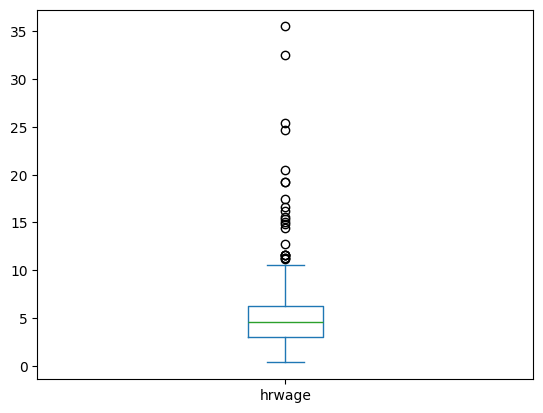

In [29]:
df.plot.box()
skewness = round(float(df.skew()), 2)
f"Skewness of {skewness}"

5. Histogram for logarithmizated(hrwage). Comparison histogram of logarithmized data with histogram of original data. Calculation of skewness of log(hrwage) conclusions.

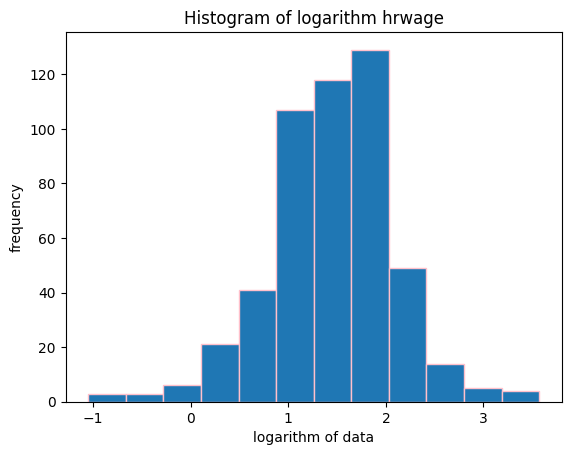

In [30]:
log_data = np.log(df)

plt.hist(log_data, bins=12, edgecolor='pink') 
plt.title("Histogram of logarithm hrwage")
plt.xlabel("logarithm of data")
plt.ylabel("frequency")
plt.show()

We can see that log data reduced extreme right skew, which we could see in original data (skewness = -0.37). But there is still slight left skew. It means that there are few low wages, but their effect isn't significant. Logarithmization makes the distribution more symmetric compared to the original.

In [31]:
skewness_log = round(float(log_data.skew()), 2)
f"Skewness of log(hrwage): {skewness_log}"

'Skewness of log(hrwage): -0.37'

6. Plot the scatter plots of hrwage vs. educ, yrsmarr, age, sleep. Compute the corresponding
correlation (Pearson and Spearmann) coefficients and interpret the results.

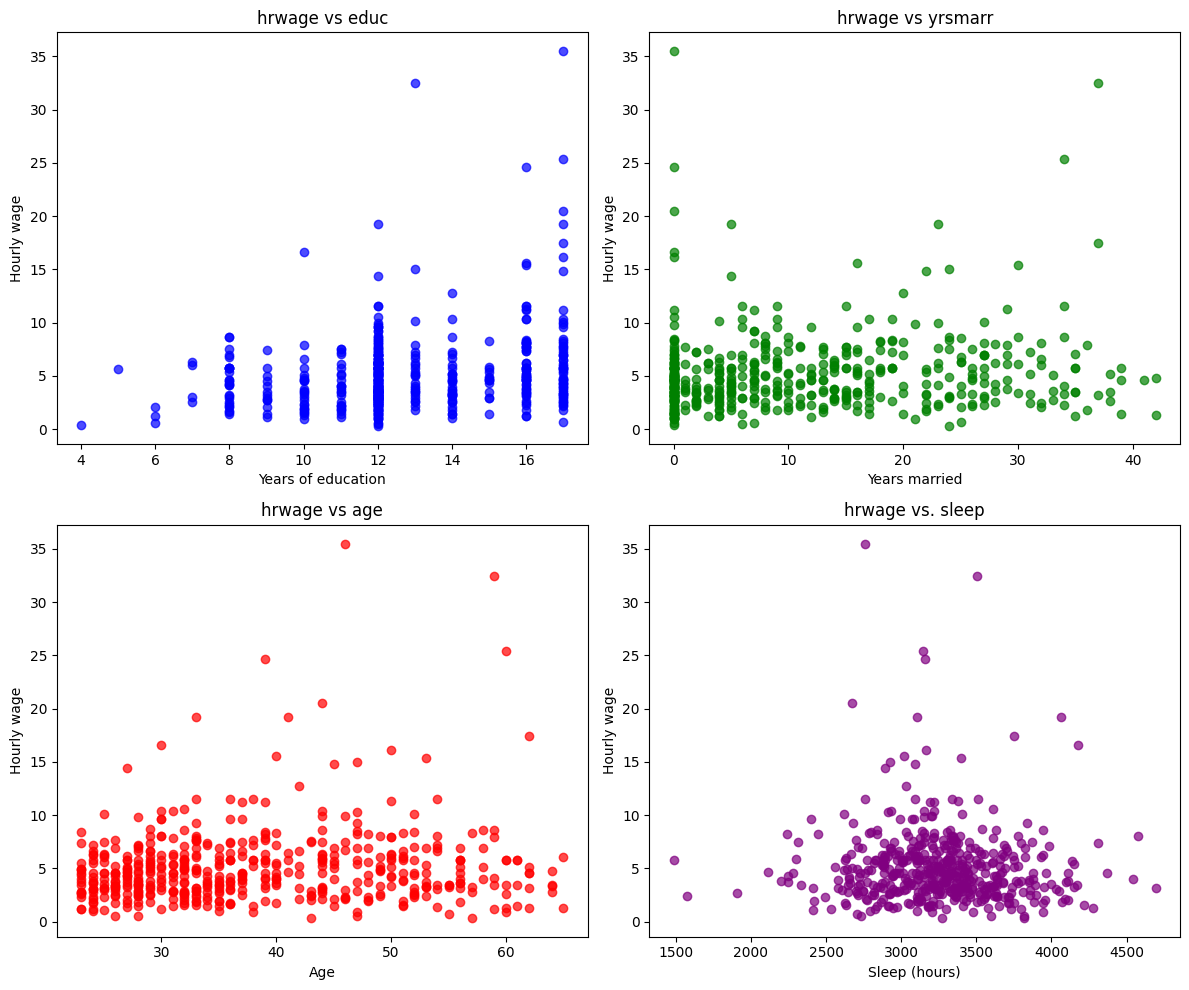

In [32]:

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

axs[0, 0].scatter(data_set['educ'], data_set['hrwage'], color='blue', alpha=0.7)
axs[0, 0].set_title('hrwage vs educ')
axs[0, 0].set_xlabel('Years of education')
axs[0, 0].set_ylabel('Hourly wage')

axs[0, 1].scatter(data_set['yrsmarr'], data_set['hrwage'], color='green', alpha=0.7)
axs[0, 1].set_title('hrwage vs yrsmarr')
axs[0, 1].set_xlabel('Years married')
axs[0, 1].set_ylabel('Hourly wage')

axs[1, 0].scatter(data_set['age'], data_set['hrwage'], color='red', alpha=0.7)
axs[1, 0].set_title('hrwage vs age')
axs[1, 0].set_xlabel('Age')
axs[1, 0].set_ylabel('Hourly wage')

axs[1, 1].scatter(data_set['sleep'], data_set['hrwage'], color='purple', alpha=0.7)
axs[1, 1].set_title('hrwage vs. sleep')
axs[1, 1].set_xlabel('Sleep (hours)')
axs[1, 1].set_ylabel('Hourly wage')

plt.tight_layout()
plt.show()


In [33]:
pearson_corr = data_set[['hrwage', 'educ', 'yrsmarr', 'age', 'sleep']].corr(method='pearson').round(2).iloc[:1]
spearman_corr = data_set[['hrwage', 'educ', 'yrsmarr', 'age', 'sleep']].corr(method='spearman').round(2).iloc[:1]


print("Pearson correlation coefficients:\n", pearson_corr)
print("\nSpearman correlation coefficients:\n", spearman_corr)

Pearson correlation coefficients:
         hrwage  educ  yrsmarr   age  sleep
hrwage     1.0  0.26     0.13  0.12  -0.05

Spearman correlation coefficients:
         hrwage  educ  yrsmarr  age  sleep
hrwage     1.0  0.25     0.14  0.1  -0.08


Pearson correlation coefficients range from 1 to -1. In our case this coefficient range from -0.05 to 0.26. It means that correlation between hrwage and education, years of marrige, age and sleep is weak or very weak. The same situation with Spearman correlation coefficients, from table data we can see that correlation is weak or very weak.

7. Two subsamples of observation: male (male = 1) and female (male = 0). Ploting
separate histograms and boxplots. Compare the results. Compute the corresponding location and dispertion
measures. What conclusions can be made?

In [34]:
female_sample = data_set[data_set['male'] == 0]
male_sample = data_set[data_set['male'] == 1]

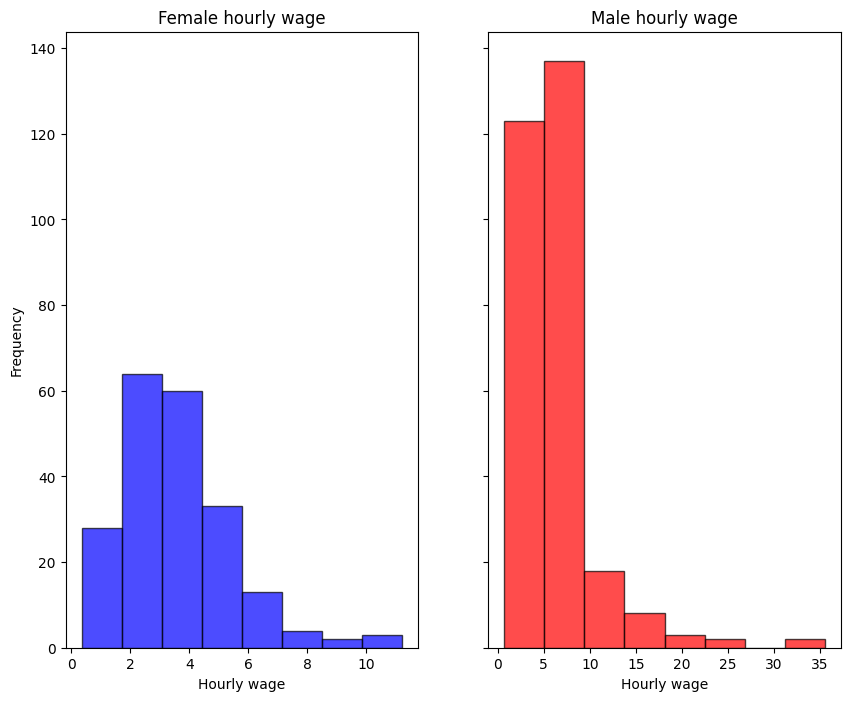

In [35]:
fig, axs = plt.subplots(1, 2, figsize=(10, 8), sharey=True) 

axs[0].hist(female_sample['hrwage'], bins=8, color='blue', edgecolor='black', alpha=0.7)
axs[0].set_title('Female hourly wage')
axs[0].set_xlabel('Hourly wage')
axs[0].set_ylabel('Frequency')

axs[1].hist(male_sample['hrwage'], bins=8, color='red', edgecolor='black', alpha=0.7)
axs[1].set_title('Male hourly wage')
axs[1].set_xlabel('Hourly wage')

plt.show()

/var/folders/lr/g27h7d295svcp5fxx4r1hn080000gn/T/ipykernel_97161/756544564.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot([female_sample['hrwage'], male_sample['hrwage']], labels=['Female', 'Male'])


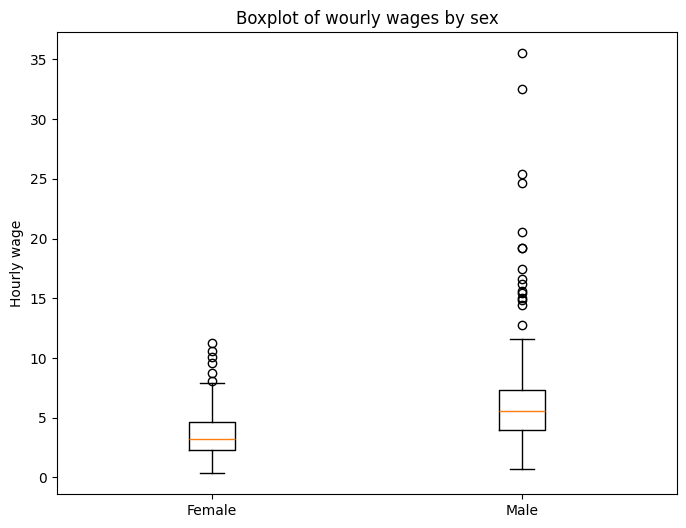

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.boxplot([female_sample['hrwage'], male_sample['hrwage']], labels=['Female', 'Male'])
ax.set_ylabel('Hourly wage')
ax.set_title('Boxplot of wourly wages by sex')
plt.show()

Histograms and boxplots indicates, that female hourly wages median is lower than male hourly wages median. Also boxplots indicate that the maximum hourly wage for women doesn't exceed 15 units per hour, while the male wage reaches up to 35 units per hour in some cases. Mean hourly wage for female is lower than male. And in general variance of female hourly wage (hw) less than male hw variance. It means that women earn approximately the same low amount per hour. (In my opinion, this can be related to poorer access to quality education and consequently to the choice of high-paying jobs.)

In [37]:
female_location_measures= {"Mean": round(float(female_sample['hrwage'].mean()), 2),
                     "Median": round(float(female_sample['hrwage'].median()), 2),
                     "Lower quartile": round(float(female_sample['hrwage'].quantile(0.25)), 2),
                     "Upper quartile": round(float(female_sample['hrwage'].quantile(0.75)), 2)
                     }

female_measures_of_variation = {"range": round(float(female_sample['hrwage'].max() - female_sample['hrwage'].min()), 2),
                         "Interquartile range": round(float(female_location_measures["Upper quartile"] - female_location_measures["Lower quartile"]), 2),
                         "Variance": round(float(female_sample['hrwage'].var()), 2)}
# female_location_measures, female_measures_of_variation

In [38]:
male_location_measures= {"Mean": round(float(male_sample['hrwage'].mean()), 2),
                     "Median": round(float(male_sample['hrwage'].median()), 2),
                     "Lower quartile": round(float(male_sample['hrwage'].quantile(0.25)), 2),
                     "Upper quartile": round(float(male_sample['hrwage'].quantile(0.75)), 2)
                     }

male_measures_of_variation = {"range": round(float(male_sample['hrwage'].max() - male_sample['hrwage'].min()), 2),
                         "Interquartile range": round(float(male_location_measures["Upper quartile"] - male_location_measures["Lower quartile"]), 2),
                         "Variance": round(float(male_sample['hrwage'].var()), 2)}
# male_location_measures, male_measures_of_variation

In the table below can see difference between average hourly wage in female and male. The difference is significant. Of course, I remember, that mean is sensetive to outliers. But median hourly wage of men is more than 70% higher than the median hourly wage of women. This is an indication of discrimination. Also measures of variation indicates that women in average rarely have high-paying jobs. Interquartile range (IQR) indicates how spread out the middle half of the data is, ignoring the very low and very high values. IQR shows us how typical the hourly wages are in the middle half of the group. Also range for feamle 10.87 indicates that female earn approximately the same low amount per hour compared to male, where range is 34.79.

**Сomparative table of  location and variation measures**

| **Measure**                | **Female**  | **Male**   |
|----------------------------|-------------|------------|
| **Location Measures**      |                          |
| Mean                       | 3.56        | 6.29       |
| Median                     | 3.2         | 5.54       |
| Lower Quartile             | 2.31        | 3.96       |
| Upper Quartile             | 4.61        | 7.35       |
| **Measures of Variation**  |             |            |
| Range                      | 10.87       | 34.79      |
| Interquartile Range        | 2.3         | 3.39       |
| Variance                   | 3.65        | 17.35      |


8. In this task I consider the grouping of data (from original dataset HW1 dataset.csv) for

    • Group1 (low wage) with hrwage ≤ 3

    • Group2 (medium wage) with 3 < hrwage ≤ 6

    • Group3 (heigh wage) with hrwage > 6

Below is the contingency table with absolute and relative frequencies. We can see that more than 70% of Group 1 consists of women. However, as the hourly wage increases (in Groups 2 and 3), the proportion of women decreases. This indicates inequality in hourly wages between females and males.

I have used this [guideline](https://www.geo.fu-berlin.de/en/v/soga-py/Basics-of-statistics/Descriptive-Statistics/Measures-of-Relation-Between-Variables/Contingency-Coeficient/index.html) to calculate contigency coefficient of Pearson(CCP). 

I have got CCP equals to 0.55, which indicate strong relation between sex and hourly wage. Accorging to this data set, there is correlation between being female and earning less.


We can not apply Pearson or Spearmann correlation coefficients to
make some conclusions about the relation of interest, because scale of measurement should be interval or ratio, but in our case this scale is nominal (male and group of hourly wage).


<!-- Can we apply Pearson or Spearmann correlation coefficients to
make some conclusions about the relation of interest? -->


| Group # | Female |    | Male |    | Total in group|    |
|----------------|------|----|-------|----|---|---|
|                | Count | %  | Count | %  | Count | %  |
| Group 1 (low wage)     | 90   | 73% | 34     | 27% |124|100%|
| Group 2 (medium wage)     | 97   | 41% | 141   | 59% |238|100%|
| Group 3 (heigh wage)   | 20  | 14% | 118  | 86% |138|100%|
<!-- | **Total**      | 2070   | 100% | 2930  | 100% |5000| -->


If you don't like numbers, look at this table! You can see the same, but in more pleasant way for you 👇

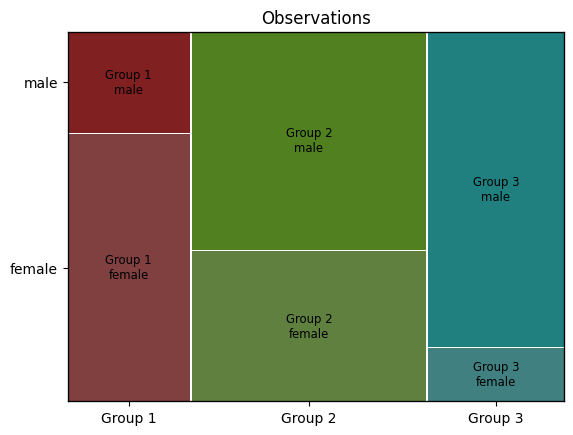

,female,male
Group 1,900,340
Group 2,970,1410
Group 3,200,1180


In [39]:
contigency_table = np.array([[900, 340], [970, 1410], [200, 1180]])
obs = pd.DataFrame(
    contigency_table,
    columns=["female", "male",],
    index=["Group 1", "Group 2", "Group 3"])

mosaic(obs.stack(), title="Observations")
plt.show()
obs

In [40]:
group_1 = data_set[data_set['hrwage'] <= 3]
group_2 = data_set[(data_set['hrwage'] > 3) & (data_set['hrwage'] <= 6)]
group_3 = data_set[data_set['hrwage'] > 6]
print(f"Dataset size: {df.size}\nGroup 1 size: {group_1.shape[0]}\nGroup 2 size: {group_2.shape[0]}\nGroup 3 size: {group_3.shape[0]}")


Dataset size: 500
Group 1 size: 124
Group 2 size: 238
Group 3 size: 138


In [41]:
female_group_1 = group_1[group_1['male'] == 0]
male_group_1 = group_1[group_1['male'] == 1]
female_number_group_1 = female_group_1.shape[0]
female_percent_group_1 = round(female_number_group_1/group_1.shape[0]*100, 2)
print("Group 1")
print(f"Fem num: {female_number_group_1}; fem percent: {female_percent_group_1}\nMale num:: {group_1.shape[0] - female_number_group_1}; Male percent: {100-female_percent_group_1}")

Group 1
Fem num: 90; fem percent: 72.58
Male num:: 34; Male percent: 27.42


In [42]:
female_group_2 = group_2[group_2['male'] == 0]
male_group_2 = group_2[group_2['male'] == 1]
female_number_group_2 = female_group_2.shape[0]
female_percent_group_2 = round(female_number_group_2/group_2.shape[0]*100, 2)
print("Group 2")
print(f"Fem num: {female_number_group_2}; fem percent: {female_percent_group_2}\nMale num:: {group_2.shape[0] - female_number_group_2}; Male percent: {100-female_percent_group_2}")

Group 2
Fem num: 97; fem percent: 40.76
Male num:: 141; Male percent: 59.24


In [43]:
female_group_3 = group_3[group_3['male'] == 0]
male_group_3 = group_3[group_3['male'] == 1]
female_number_group_3 = female_group_3.shape[0]
female_percent_group_3 = round(female_number_group_3/group_3.shape[0]*100, 2)
print("Group 3")
print(f"Fem num: {female_number_group_3}; fem percent: {female_percent_group_3}\nMale num:: {group_3.shape[0] - female_number_group_3}; Male percent: {100-female_percent_group_3}")

Group 3
Fem num: 20; fem percent: 14.49
Male num:: 118; Male percent: 85.51


Below I calculate contigency coefficient of Pearson

In [44]:
chisqVal = np.sum((contigency_table - expected_freq(obs)) ** 2 / expected_freq(obs))
chisqVal

np.float64(909.1665766095005)

In [45]:
C_star = np.sqrt(chisqVal / (np.sum(contigency_table) + chisqVal))
C_star

np.float64(0.3922460821192232)

In [46]:
count_row = obs.shape[0]  
count_col = obs.shape[1]  
r, c = obs.shape

k = min(r, c)
C_star_max = np.sqrt((k - 1) / k)
contigency_coeff_of_Pearson = C_star / C_star_max
contigency_coeff_of_Pearson

np.float64(0.5547197291207162)